In [3]:
from setup_general import *
from setup_embedding import *

# Preparation - extract text from ds

In [106]:
def collect_text(item):
    return ' '.join(item[text_features]).strip()

data = prep.copy()

text_features = ['name', 'commentary', 'text', 'legend', 'initial_info', 'additional_text']
data[text_features] = data[text_features].fillna('')
data['text_features'] = data.apply(lambda item: collect_text(item),axis=1)

data.to_csv('data/prep.csv')

In [ ]:
data = prep.copy()
with_damages = combined_data_fully_translated.copy()

data.text_features = data.text_features.replace(float('nan'), ' ',)
with_damages.damages = with_damages.damages.replace(float('nan'), ' ',)

data.text_features = data.text_features + ' ' + with_damages.damages

data.to_csv('data/prep.csv')

In [12]:
data = prep.copy()
text = data[['text_features','type','source']]
text.to_csv('data/text.csv')

In [16]:
data = text.copy()
data.text_features = data.text_features.apply(lambda x: x.strip())
data = data[data.text_features != '']
data.to_csv('data/text.csv')

In [ ]:
df = text.copy()
train = df[df.source == 'train']
test = df[df.source == 'test']
train.to_csv('data/train_text.csv', index=True)
test.to_csv('data/test_text.csv', index=True)

# naive checks for type from text keywords

In [3]:
data = train_text.copy()
data.text_features = data.text_features.replace(float('nan'), '')

In [11]:
# first tries
true_counter = 0
false_counter = 0

false = []
for i, item in data.iterrows():    
    local_counter = 0
    pred = []
    for type in types:            
        if type in item.text_features:
            local_counter += 1
            pred.append(type)
    if ('drawing' in item.text_features) or ('sketch' in item.text_features) or ('design' in item.text_features):
        pred.append('design/drawing/sketch')
        local_counter += 1
    if 'negative' in item.text_features:
        pred.append('photo negative')
        local_counter += 1

    if local_counter > 0:
        if pred[-1] == item.type:           
            true_counter += 1
        else:
            false_counter += 1
            false.append(str(pred)+item.type)

print(false_counter,true_counter)
# from 14900 texts

982 2257


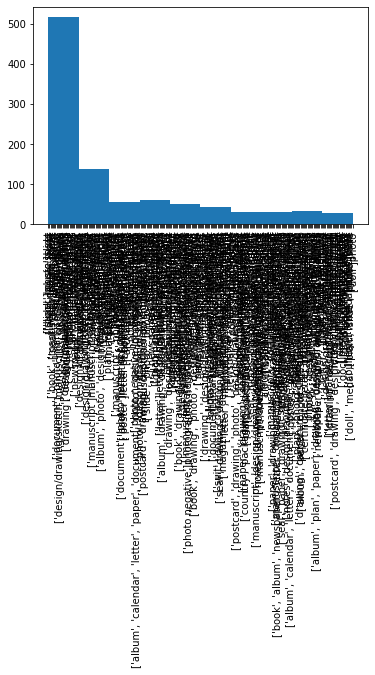

In [16]:
# investigete what is predicted wrong
plt.hist(false)
plt.xticks(rotation='vertical')
plt.show()

# gpt3 text embeddings


In [ ]:
openai.api_key = '***'
count = 0
def get_embedding(text, model="text-similarity-davinci-001"):
    global count
    count += 1
    text = text.replace("\n", " ")
    try:
        result = openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']
    except:
        print(count)
        time.sleep(60)
        result = openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']
    return result
 
text['curie_similarity'] = text.text_features.apply(lambda x: get_embedding(x, model='text-similarity-curie-001'))
text.to_csv('data/curie.csv', index=False)

In [16]:
df = curie.copy()
train_emb = df[df.source == 'train']
test_emb = df[df.source == 'test']
train_emb.to_csv('data/train_curie.csv', index=True)
test_emb.to_csv('data/test_curie.csv', index=True)

# bag of words

In [ ]:
def get

text['curie_similarity'] = text.text_features.apply(lambda x: get_embedding(x, model='text-similarity-curie-001'))

# xg & rf on embedding

In [4]:
df = bal_train_curie.copy()

In [5]:
df.head()

0         1         2         3         4         5         6  \
id                                                                         
0  -0.004959  0.002867  0.009928  0.034737 -0.015355  0.005791 -0.004311   
1  -0.006663  0.008878 -0.001398  0.030559 -0.007016  0.007792 -0.014565   
2  -0.001977  0.017488  0.016144  0.018786 -0.018720  0.015561 -0.005956   
3   0.003836  0.016786  0.008882  0.034449 -0.014569  0.014998 -0.003158   
4   0.013993  0.003524 -0.013823  0.020448 -0.024583  0.017075 -0.001035   

           7         8         9        10        11        12        13  \
id                                                                         
0  -0.000938  0.009757  0.021879 -0.024072 -0.000766 -0.009597  0.031163   
1   0.007602 -0.004015  0.030140 -0.044390 -0.001563 -0.014384  0.012088   
2   0.005994  0.017178  0.012646 -0.026853 -0.014132 -0.012148  0.016887   
3  -0.005962  0.023140  0.019246 -0.020270 -0.005687 -0.014411  0.013265   
4  -0.022008  0.015722  0.026763 -0.020129  0.001957 -0.008307  0.012790   

          14        15        16        17        18        19        20  \
id                                                                         
0   0.005805 -0.023637 -0.014050 -0.018257  0.003555  0.011147 -0.001289   
1   0.002039 -0.014936 -0.006130 -0.010612  0.014975  0.006354 -0.008535   
2   0.001557 -0.025744 -0.002788 -0.012674 -0.000497  0.007602 -0.008349   
3   0.008151 -0.003612  0.002216 -0.012185  0.002037  0.000265 -0.001310   
4   0.002030 -0.010666 -0.006075 -0.016229 -0.001616 -0.003263 -0.002207   

          21        22        23        24        25        26        27  \
id                                                                         
0   0.000513  0.002699 -0.010552  0.006391  0.024564 -0.007465 -0.024602   
1   0.013593 -0.004115  0.009245  0.006625  0.001001  0.009302 -0.028292   
2   0.005989 -0.004405  0.004198  0.014433  0.002614 -0.000515 -0.017639   
3  -0.001699 -0.009902 -0.000050  0.018976  0.007848  0.003738 -0.021481   
4  -0.001319 -0.003423  0.017827  0.002424  0.000890  0.004421 -0.028906   

          28        29        30        31        32        33        34  \
id                                                                         
0  -0.006165  0.026625 -0.004125 -0.008363 -0.001711  0.093943  0.008259   
1  -0.005868  0.016956 -0.005406  0.000003  0.010812  0.097239 -0.005430   
2  -0.021588  0.012815 -0.004713 -0.008279  0.009995  0.094099  0.013361   
3   0.001195  0.023885 -0.001507 -0.017765  0.007890  0.108730  0.001482   
4   0.001129  0.017864 -0.015759  0.002228  0.012771  0.102393 -0.004238   

          35        36        37        38        39        40        41  \
id                                                                         
0   0.005323 -0.011677  0.001895 -0.007384 -0.110508 -0.017387  0.012433   
1   0.008568  0.004801 -0.005415  0.000244 -0.102497 -0.004958  0.021624   
2   0.022660  0.003084  0.001386  0.002094 -0.123810 -0.007386  0.019858   
3  -0.002032 -0.004453  0.000077  0.010936 -0.125349 -0.005147  0.009800   
4   0.039920  0.000700  0.001358  0.006714 -0.093296 -0.009238  0.004278   

          42        43        44        45        46        47        48  \
id                                                                         
0   0.002147 -0.012906  0.011516 -0.004444  0.001937  0.004215 -0.001861   
1  -0.003758 -0.020004  0.014298  0.012698  0.002553 -0.001098  0.000828   
2  -0.011179  0.002454  0.016228  0.023130 -0.002924 -0.009181  0.007799   
3  -0.006628 -0.014672  0.015287  0.006754  0.007024  0.002120 -0.005990   
4   0.001877 -0.016868  0.024452  0.009129  0.011859 -0.001118  0.000537   

          49        50        51        52        53        54        55  \
id                                                                         
0   0.001078  0.026360 -0.000597  0.009072  0.010712 -0.008812  0.000892   
1   0.004996  0.008592 -0.002405  0.011126  0.006859

In [6]:
features = df.drop(['type'], axis=1)
labels = df.type
# at least xgboost cannot deal with string labels
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(labels)
labels = label_encoder.transform(labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

In [7]:
bst = XGBClassifier(random_state=0)
bst.fit(features, labels)
y_pred = bst.predict(X_test)
accuracy_score(y_test, y_pred)

0.9969183359013868

In [8]:
bst.save_model('models/nlp/bal_full_xg_emb.json')

In [6]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.97      0.97      0.97       235
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         3
           4       0.75      0.70      0.72       143
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         3
           8       1.00      0.94      0.97        50
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         7
          11       0.97      0.94      0.96       229
          12       1.00      0.87      0.93        52
          13       0.00      0.00      0.00         5
          14       1.00      0.11      0.20        73
          15       0.00      0.00      0.00         4
          16       1.00      0.06      0.12        16
          17       0.00    

/home/till/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/till/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/till/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
